# Desafio 1

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import factor_analyzer as factor
import missingno as magn

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('bfi.csv')
df.head(5)

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


# Desafio 2

In [2]:
df = df.drop(columns='Unnamed: 0')

<AxesSubplot:>

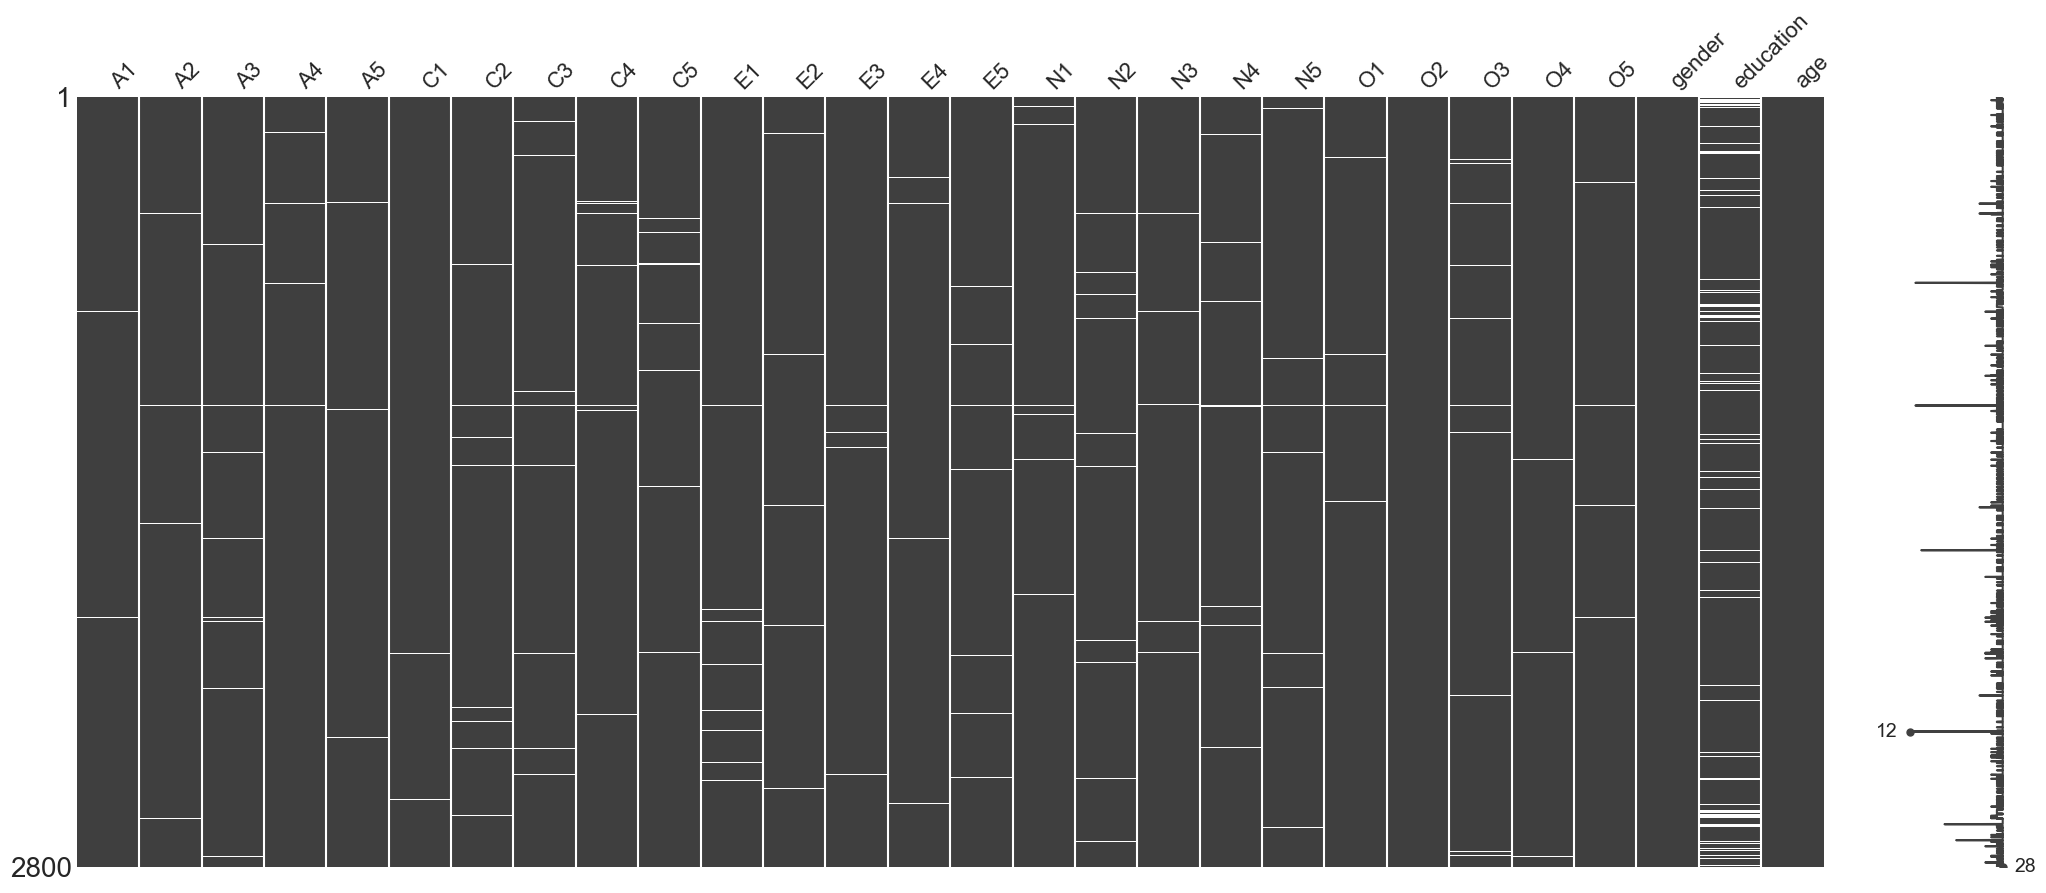

In [3]:
magn.matrix(df)
# Visualmente se puede ver que la columna education tiene la mayor cantidad de valores faltantes

In [4]:
def conteo_nan(df):
    number_nan_count = df.isna().sum()
    percentage_nan_count = round(number_nan_count / sum(number_nan_count), 2)

    resumen_cantidad_nan = pd.DataFrame(
        {'Cantidad Nan': number_nan_count, 'Porcentaje NaN': percentage_nan_count},
        index=df.columns)
    
    return resumen_cantidad_nan

conteo_nan(df).sort_values(by='Porcentaje NaN', ascending=False)

# Efectivamente, education es la columna con una mayor cantidad de valores faltantes
# Luego lo sigue N4, que es la oracion "Usualmente me siento melancolico"

,Cantidad Nan,Porcentaje NaN
education,223,0.31
N4,36,0.05
A3,26,0.04
A2,27,0.04
C4,26,0.04
N5,29,0.04
O3,28,0.04
E3,25,0.03
O1,22,0.03
N2,21,0.03


In [5]:
df_sin_na = df.dropna()

# Desafio 3

In [6]:
numeros_pregunta = ['1', '2', '3', '4', '5']
columnas_preguntas = [columna for columna in df_sin_na.columns if columna[-1] in numeros_pregunta]
preguntas_df = df_sin_na[columnas_preguntas]

In [7]:
medias_preguntas = preguntas_df.mean()
respuestas_rankeadas = medias_preguntas.sort_values()

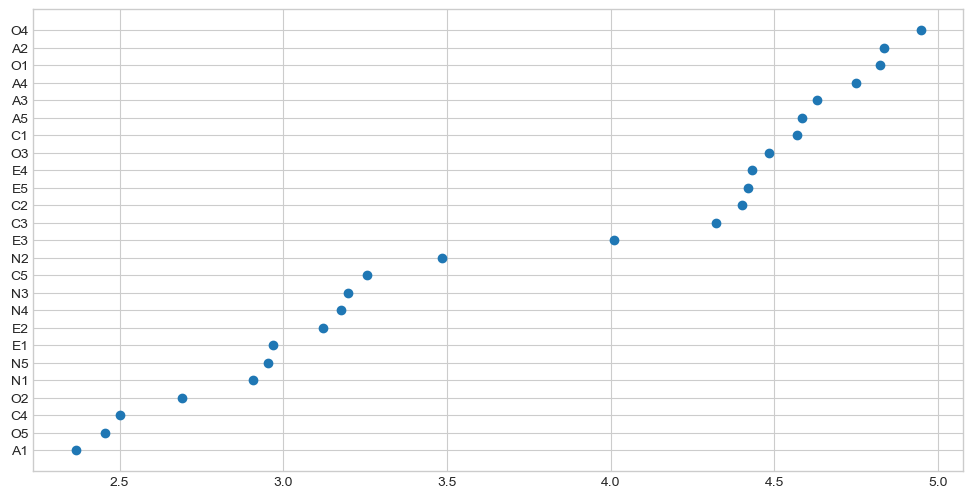

In [8]:
plt.plot(respuestas_rankeadas.array, respuestas_rankeadas.index, 'o')
# O4 (Dedico tiempo a la reflexion de cosas) fue la pregunta que tuvo la media mayor
# A2 (Me preocupo delbienestar de otros) fue la segunda pregunta con la mayor media

<AxesSubplot:>

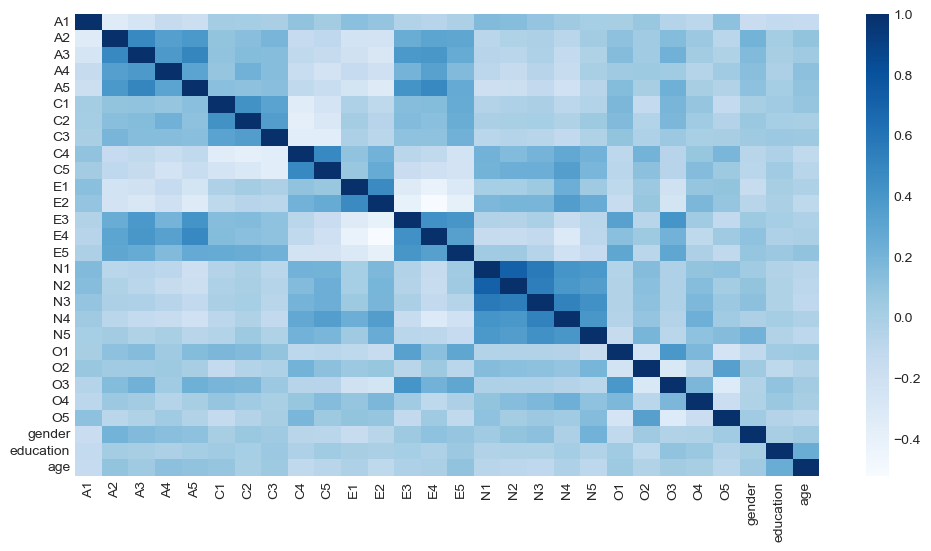

In [9]:
correlaciones = df_sin_na.corr()
sns.heatmap(correlaciones, cmap='Blues')

# De forma general se puede ver una alta correlacion entre las preguntas 
# N1 a N5 (Preguntas de Neuroticismo).

# Se puede ver una correlacion moderada entre las preguntas C4 a E2 (Escrupulosidad y Extroversion)
# con las preguntas N1 a N5 (Neuroticismo)

# Tambien se ve una correlacion moderada - alta entre las preguntas A2 a C3 (Amabildad y creo que
# un poco de Responsabilidad)y las preguntas E3 a E5 (Extroversoin)

# Desafio 4

In [10]:
factor.calculate_bartlett_sphericity(preguntas_df)

# La prueba de esferacidad de bartlett rechaza a la hipotesis nula
# (p-value < 0.05). Esto estaria indicando que la matriz de correlacion NO es
# una matriz de identidad. O sea, que al menos 2 variables tienen una correlacion

(16509.673550497202, 0.0)

In [11]:
factor.calculate_kmo(preguntas_df)[0]
# La prueba de Kaiser-Meyer-Olkin obtuvo un valor global de 0.75. Esto estaria indicando
# que existe al menos 1 factor latente en nuestros datos

array([0.73783211, 0.83426339, 0.87158082, 0.87042369, 0.90061871,
       0.83810325, 0.78841959, 0.84946345, 0.82364592, 0.86188771,
       0.84151427, 0.88389524, 0.89307072, 0.87818653, 0.89404239,
       0.7781268 , 0.77845262, 0.86005895, 0.88625489, 0.86049617,
       0.85501182, 0.78381059, 0.83374388, 0.78111794, 0.75804877])

In [12]:
factorize = factor.FactorAnalyzer(n_factors=10, rotation=None)
factorize.fit(preguntas_df)
eigenvalues = factorize.get_eigenvalues()[0]

Text(0, 0.5, 'Valor de Factor')

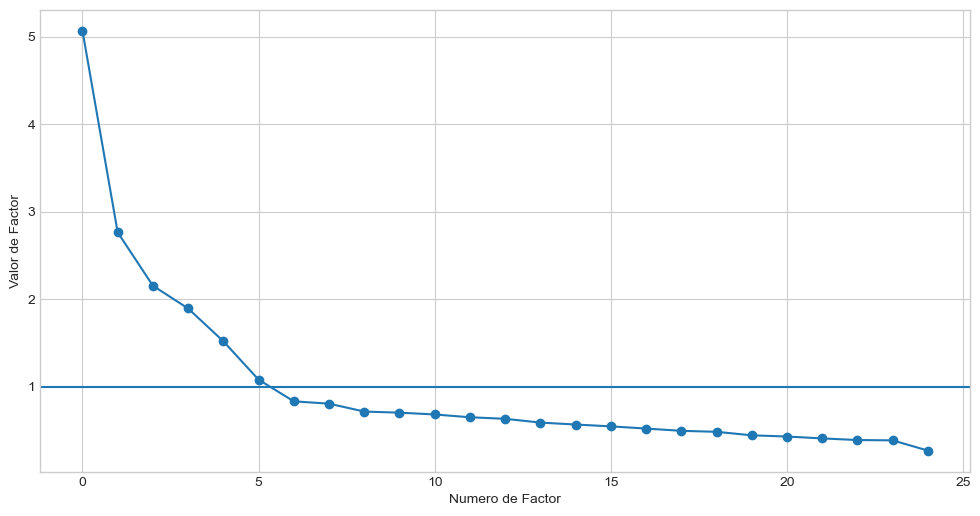

In [13]:
plt.plot(range(len(eigenvalues)), eigenvalues, 'o-')
plt.axhline(1)
plt.xlabel('Numero de Factor')
plt.ylabel('Valor de Factor')

# Segun el scree plot, los factores que tienen un valor mayor a 1
# son los factores 0, 1, 2, 3, 4 y 5. Por lo tanto, se obtendran esta
# cantidad de factores latentes.

In [14]:
factorize_6_values = factor.FactorAnalyzer(n_factors=6, rotation=None)
factorize_6_values.fit(preguntas_df)
eigenvalues_6 = factorize_6_values.get_eigenvalues()[0]

<AxesSubplot:>

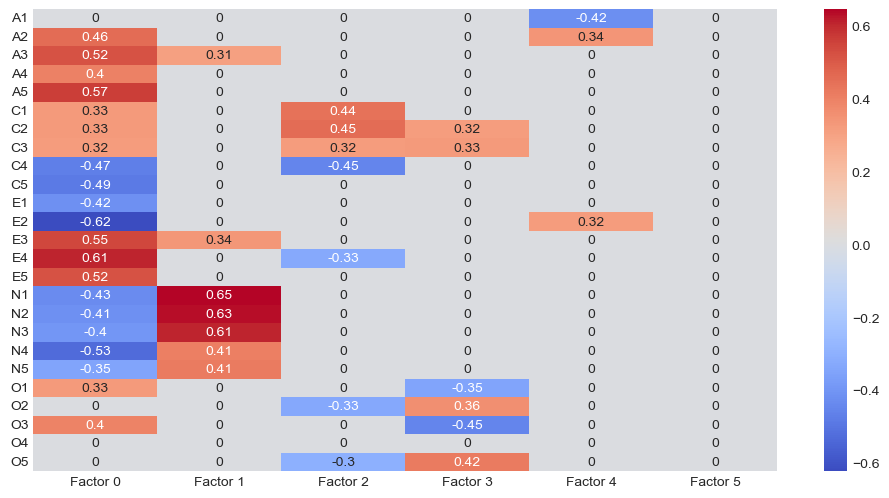

In [15]:
resumen_factores = pd.DataFrame(factorize_6_values.loadings_, columns=[
                                f'Factor {i}' for i in range(6)], index=preguntas_df.columns)

resumen_factores_filtrados = resumen_factores.applymap(lambda x: np.where(abs(x) > 0.3, x, 0))
sns.heatmap(resumen_factores_filtrados, cmap='coolwarm', annot=True)

- **Factor 0:** El factor 0 tiene una alta contribucion positiva de las preguntas A2 hasta C3 y O1 con 
O3. Por otro lado, tiene una alta contribucion negativa de las preguntas C4 a E2 junto a N1 a N5.
Las preguntas que contribuyen positivamente al factor estan relacionadas a la empatia y el buen
trato con otras personas (sociabilizar y preocuparse por otros). Las preguntas que afectan negativamente
a este factor estan relacionadas con una poca sociabilizacion y poca preocupacion por el bienestar
del otro. Por lo tanto, este factor se podria resumir como: "Grado de Preocupacion por el otro"

- **Factor 1:** El factor 1 tiene una alta contribucion positiva de las preguntas A3, E3 y N1 a N5. 
Estas preguntas estan relacionadas a sentir emociones "fuertes" o "intensas" que usualmente tienen
una connotacion negativa (Enojo, Irritacion, Panico). Ademas, tiene una alta contribucion de cambios
de animo. Por lo tanto, este factor se podria resumir como: "Volatilidad emocional"

- **Factor 2:** El factor 2 tiene una alta contribucion positiva de las preguntas C1 a C3. Ademas, 
tienen una contribucion negativa de las preguntas C4, E4, O2 y O5. Las preguntas que afectan
postiviamente estan relacionadas a tener una gran procupacion por realizar un buen trabajo. Las
preguntas que afectan negativamente tienen relacion con realizar un trabajo deficiente/sin esforzarse.
Por lo tanto, este factor se podria resumir como: "Preocupacion e innovacion por el trabajo"

- **Factor 3**: El factor tiene una alta contribucion positiva de las preguntas C2, C3, O2 y O5.
Por otro lado, el factor tiene una alta contribucion negativa de las preguntas O1 y O3. Las preguntas
que contribuyen positivamente tienen relacion con ejercer un trabajo al pie de la letra, pero sin
ahondar mas alla. Las preguntas que contribuyen negativamente tienen relacion con la innovacion o
ahondar mas alla en un tema. Por lo tanto, este factor se podria resumir como: "Nivel de operatividad"

- **Factor 4**: El factor tiene una alta contribucion positiva de las preguntas A2 y E2. Por otro lado,
tiene una contribucion negativa de la pregunta A1. Las preguntas que aportan positivamente tienen
relacion con la preocupacion de los otros, pero sin necesidad de interactuar con ellos. La pregunta
que afecta negativamente tiene relacion con la indeferencia a los sentimientos de otros. Por lo
tanto, este factor se podria resumir como: "Preocupacion por el bienestar de la comunidad"

- **Factor 5**: El factor 5 no tiene ninguna relacion con algun factor (con un valor limite de 0.3).
Por lo tanto, seria recomendable sacarlo del modelo.

# Desafio 5

In [16]:
datos_transformados = factorize_6_values.transform(preguntas_df)
df_transformada = pd.DataFrame(datos_transformados, columns=[
                                f'Factor {i}' for i in range(6)])

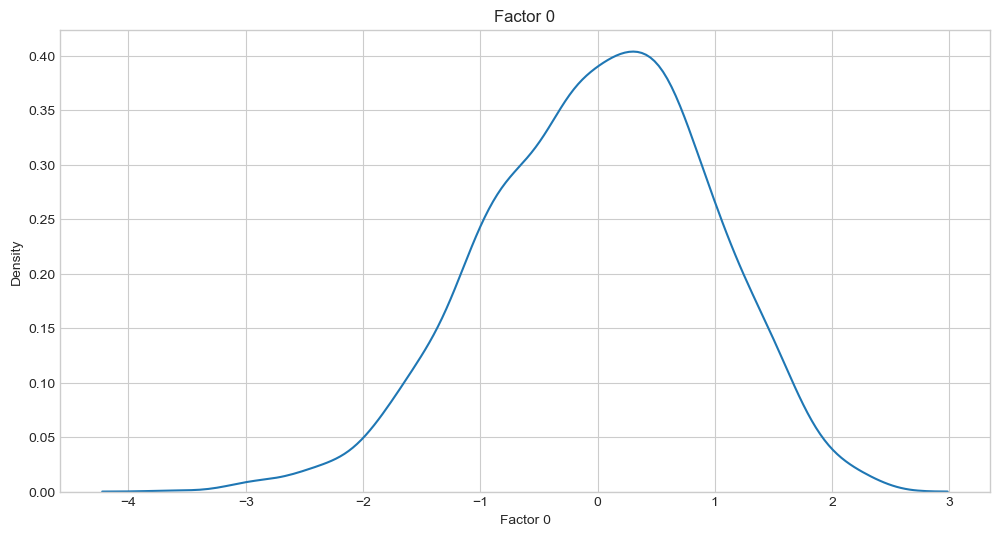

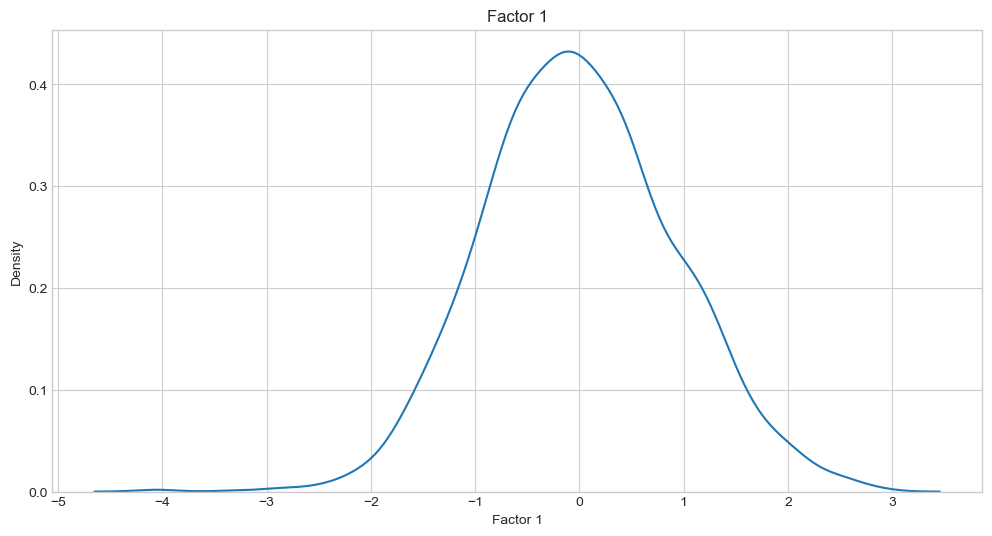

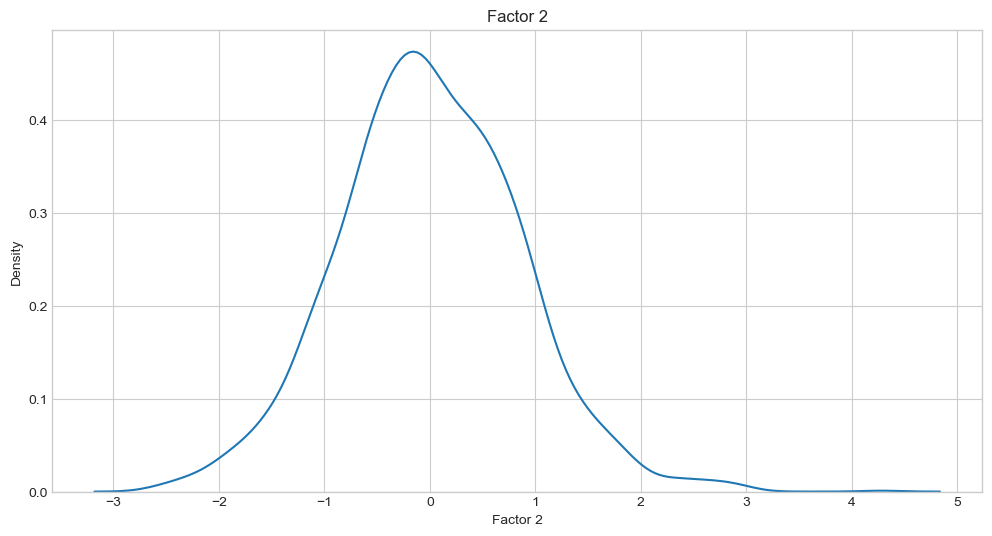

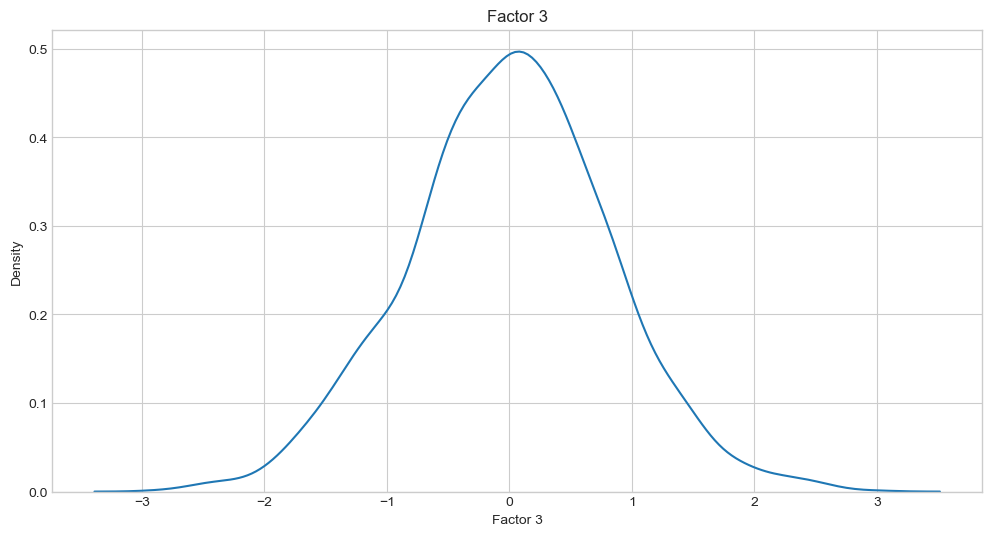

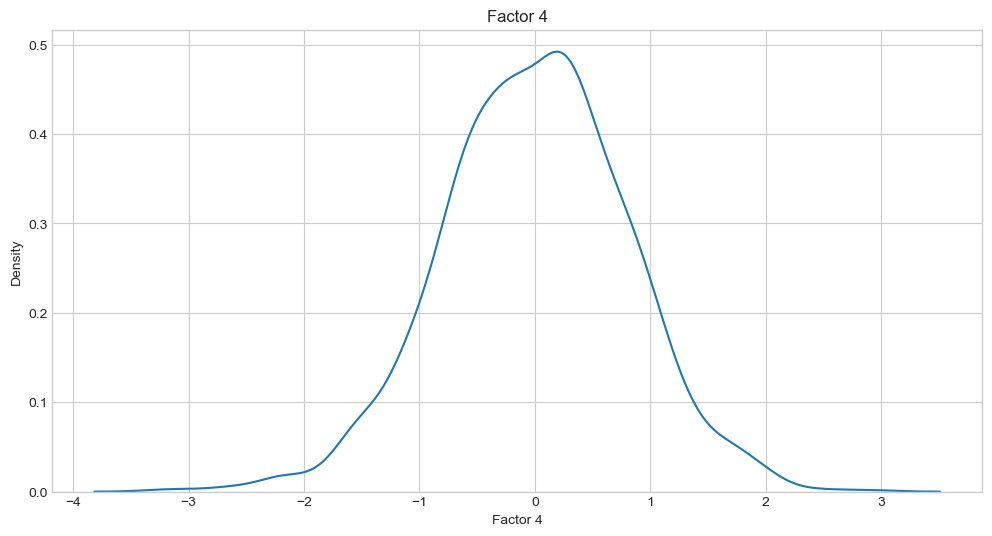

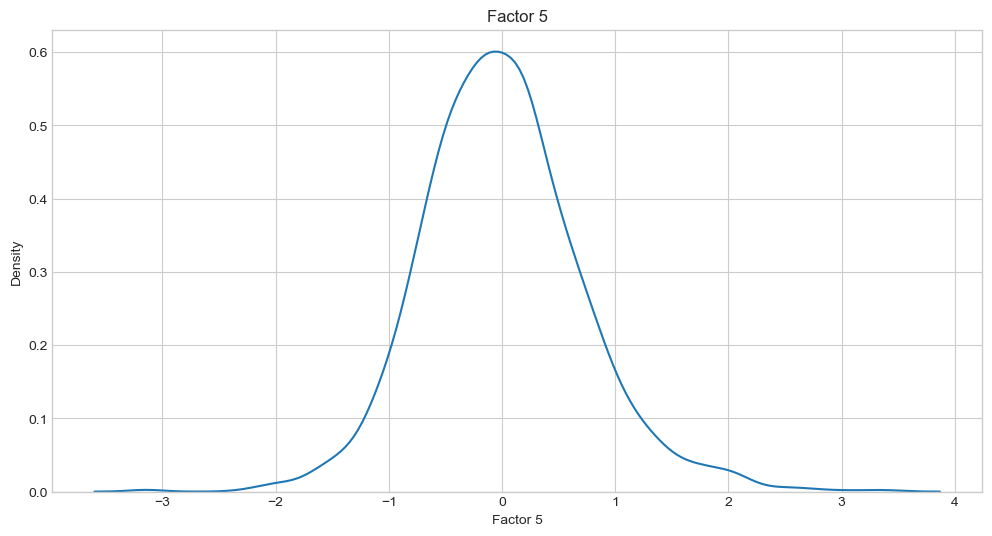

In [17]:
for columna, contenido_columna in df_transformada.iteritems():
    sns.kdeplot(contenido_columna)
    plt.title(columna)
    plt.show()

In [23]:
demographic_df = df[['gender', 'education', 'age']].dropna()

In [27]:
factorize_demographic = factor.FactorAnalyzer(rotation='varimax')
factorize_demographic.fit(demographic_df)
eigen_demographic = factorize_demographic.get_eigenvalues()[0]
eigen_demographic

array([1.24937192, 0.99682153, 0.75380656])

Text(0, 0.5, 'Valor de Factor')

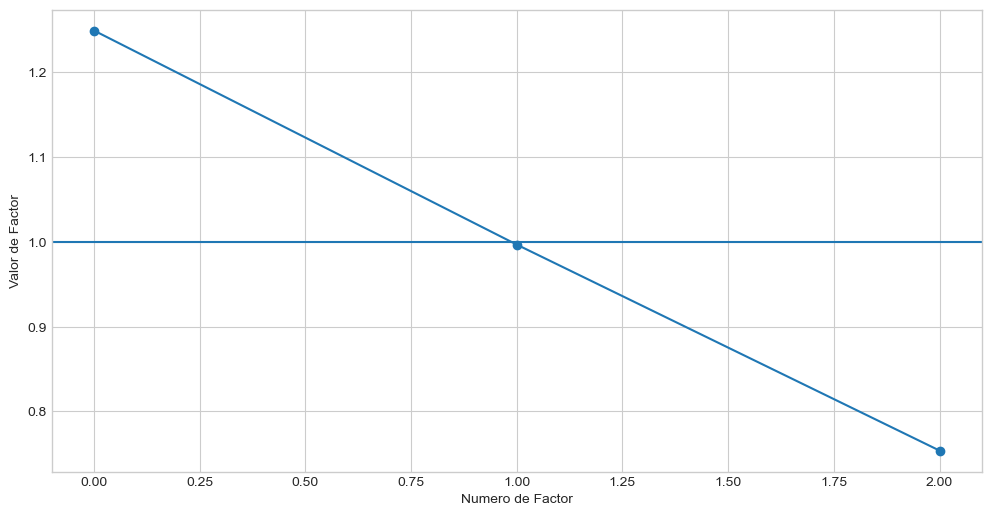

In [28]:
plt.plot(range(len(eigen_demographic)), eigen_demographic, 'o-')
plt.axhline(1)
plt.xlabel('Numero de Factor')
plt.ylabel('Valor de Factor')

# Solamente el Factor 0 tiene un valor mayor a 1

In [29]:
factorize_demographic_1_factor = factor.FactorAnalyzer(n_factors=1, rotation='varimax')
factorize_demographic_1_factor.fit(demographic_df)
factorize_demographic_1_factor.loadings_

# En el factor creado, se puede ver que todas las variables afectan negativamente a este.
# La variable que afecta de forma mas negativa al valor es Age, seguido de education y
# genero. Por lo tanto, se podria resumir como: "Curiosidad por estudiar"

c:\Users\Javier\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:626: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


array([[-0.05109303],
       [-0.24249   ],
       [-0.99755497]])